In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Projects/Similarity_Questions/quora_duplicate_questions.tsv', sep = '\t')

In [3]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.tail()

,id,qid1,qid2,question1,question2,is_duplicate
382172,382172,513992,513993,I'm 26 year old male having baldness in crown ...,I'm a 22 years old male having baldness as sho...,0
382173,382173,27618,59096,How does banning 500 and 1000 rupee notes help...,How does invalidating ₹500 and ₹1000 notes hel...,1
382174,382174,513994,513995,What should I pay attention to when hosting wi...,"As an Airbnb host, I want to maximize my profi...",0
382175,382175,513996,513997,What is the philosophy of thinking?,What is the philosophy of logical thinking?,0
382176,382176,513998,513999,In what way do laboratory information manageme...,How many percentage of men are circumcised?,0


In [6]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
372949,372949,503713,21407,What is the best home theater system (includin...,What is the best amplifier for a home theater?,0
367058,367058,497308,497309,How is the education system in China?,What do you think of the education system in C...,1
140281,140281,222952,222953,What I do use KNN classification after finding...,How can I get all the kickboxing belt grades?,0
347320,347320,475782,75155,What order did the Star Wars movies premier in?,What is the best order to watch the Star Wars ...,0
187150,187150,285289,285290,What is it like to be a child of incest?,What's it like being a child of incest?,1


In [7]:
df.shape

(382177, 6)

In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382177 entries, 0 to 382176
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            382177 non-null  int64 
 1   qid1          382177 non-null  int64 
 2   qid2          382177 non-null  int64 
 3   question1     382176 non-null  object
 4   question2     382175 non-null  object
 5   is_duplicate  382177 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 17.5+ MB


In [10]:
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [12]:
df.shape

(382174, 6)

In [13]:
df.is_duplicate.value_counts()

0    240492
1    141682
Name: is_duplicate, dtype: int64

In [14]:
(df.is_duplicate.value_counts().loc[1]/df.shape)[0]

0.37072642304290715

In [15]:
df.drop(['id', 'qid1', 'qid2'], axis = 1 , inplace = True )

In [16]:
df.head()

,question1,question2,is_duplicate
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [17]:
is_dup = df['is_duplicate'].value_counts()

is_dup

0    240492
1    141682
Name: is_duplicate, dtype: int64

In [18]:
is_dup.index

Int64Index([0, 1], dtype='int64')

In [19]:
is_dup.values

array([240492, 141682])

<Axes: >

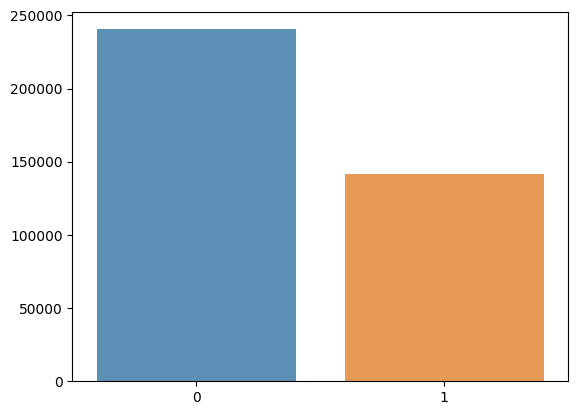

In [20]:
sns.barplot(x = is_dup.index,y =  is_dup.values, alpha=0.8)

In [21]:

SPECIAL_TOKENS = {'non-ascii': 'non_ascii_word'}

def clean(text, stem_words=True):
    def pad_str(s):
        return ' '+s+' '

    if pd.isnull(text):
        return ''

    # Empty question

    if type(text) != str or text=='':
        return ''

    # Clean the text
    text = re.sub("\'s", " ", text) # we have cases like "Sam is" or "Sam's" (i.e. his) these two cases aren't separable, I choose to compromise are kill "'s" directly
    text = re.sub(" whats ", " what is ", text, flags=re.IGNORECASE) # replace whats by what is and ignore case
    text = re.sub("\'ve", " have ", text) # replace 've by have
    text = re.sub("can't", "can not", text) # replace can't by can not
    text = re.sub("n't", " not ", text) # replace n't by not
    text = re.sub("i'm", "i am", text, flags=re.IGNORECASE) # replace i'm by i am and ignore case
    text = re.sub("\'re", " are ", text) # replace 're by are
    text = re.sub("\'d", " would ", text) # replace 'd by would
    text = re.sub("\'ll", " will ", text) # replace 'll by will
    text = re.sub("e\.g\.", " eg ", text, flags=re.IGNORECASE) # replace e.g. by eg and ignore case
    text = re.sub("b\.g\.", " bg ", text, flags=re.IGNORECASE) # replace b.g. by bg and ignore case
    text = re.sub("(\d+)(kK)", " \g<1>000 ", text)
    text = re.sub("e-mail", " email ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?U\.S\.A\.", " America ", text, flags=re.IGNORECASE)
    text = re.sub("(the[\s]+|The[\s]+)?United State(s)?", " America ", text, flags=re.IGNORECASE)
    text = re.sub("\(s\)", " ", text, flags=re.IGNORECASE)
    text = re.sub("[c-fC-F]\:\/", " disk ", text)

    # remove comma between numbers, i.e. 15,000 -> 15000
    text = re.sub('(?<=[0-9])\,(?=[0-9])', "", text)

    # add padding to punctuations and special chars, we still need them later
    text = re.sub('\$', " dollar ", text)
    text = re.sub('\%', " percent ", text)
    text = re.sub('\&', " and ", text)

    text = re.sub('[^\x00-\x7F]+', pad_str(SPECIAL_TOKENS['non-ascii']), text)

    # indian dollar
    text = re.sub("(?<=[0-9])rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(" rs(?=[0-9])", " rs ", text, flags=re.IGNORECASE)

    # clean text rules get from : https://www.kaggle.com/currie32/the-importance-of-cleaning-text
    text = re.sub(r" (the[\s]+|The[\s]+)?US(A)? ", " America ", text)
    text = re.sub(r" UK ", " England ", text, flags=re.IGNORECASE)
    text = re.sub(r" india ", " India ", text)
    text = re.sub(r" switzerland ", " Switzerland ", text)
    text = re.sub(r" china ", " China ", text)
    text = re.sub(r" chinese ", " Chinese ", text)
    text = re.sub(r" imrovement ", " improvement ", text, flags=re.IGNORECASE)
    text = re.sub(r" intially ", " initially ", text, flags=re.IGNORECASE)
    text = re.sub(r" quora ", " Quora ", text, flags=re.IGNORECASE)
    text = re.sub(r" dms ", " direct messages ", text, flags=re.IGNORECASE)
    text = re.sub(r" demonitization ", " demonetization ", text, flags=re.IGNORECASE)
    text = re.sub(r" actived ", " active ", text, flags=re.IGNORECASE)
    text = re.sub(r" kms ", " kilometers ", text, flags=re.IGNORECASE)
    text = re.sub(r" cs ", " computer science ", text, flags=re.IGNORECASE)
    text = re.sub(r" upvote", " up vote", text, flags=re.IGNORECASE)
    text = re.sub(r" iPhone ", " phone ", text, flags=re.IGNORECASE)
    text = re.sub(r" \0rs ", " rs ", text, flags=re.IGNORECASE)
    text = re.sub(r" calender ", " calendar ", text, flags=re.IGNORECASE)
    text = re.sub(r" ios ", " operating system ", text, flags=re.IGNORECASE)
    text = re.sub(r" gps ", " GPS ", text, flags=re.IGNORECASE)
    text = re.sub(r" gst ", " GST ", text, flags=re.IGNORECASE)
    text = re.sub(r" programing ", " programming ", text, flags=re.IGNORECASE)
    text = re.sub(r" bestfriend ", " best friend ", text, flags=re.IGNORECASE)
    text = re.sub(r" dna ", " DNA ", text, flags=re.IGNORECASE)
    text = re.sub(r" III ", " 3 ", text)
    text = re.sub(r" banglore ", " Banglore ", text, flags=re.IGNORECASE)
    text = re.sub(r" J K ", " JK ", text, flags=re.IGNORECASE)
    text = re.sub(r" J\.K\. ", " JK ", text, flags=re.IGNORECASE)

    # replace the float numbers with a random number, it will be parsed as number afterward,
    # and also been replaced with word "number"

    text = re.sub('[0-9]+\.[0-9]+', " 87 ", text)


    # Try 1. keeping and 2. removing puncutation to see if the results change.
    # Result: Tried with random forest, there was no change in the result (except a slight change in confusion matrix).
    # Remove punctuation from text.
    text = ''.join([c for c in text]).lower()

    # Return a list of words
    return text

df['question1'] = df['question1'].apply(clean)
df['question2'] = df['question2'].apply(clean)


In [23]:
for i in range(20,27):
  print(df.question1[i])
  print(df.question2[i])
  print(100 * '-')

why do rockets look white?
why are rockets and boosters painted white?
----------------------------------------------------------------------------------------------------
what  causing someone to be jealous?
what can i do to avoid being jealous of someone?
----------------------------------------------------------------------------------------------------
what are the questions should not ask on quora?
which question should i ask on quora?
----------------------------------------------------------------------------------------------------
how much is 30 kv in hp?
where can i find a conversion chart for cc to horsepower?
----------------------------------------------------------------------------------------------------
what does it mean that every time i look at the clock the numbers are the same?
how many times a day do a clock non_ascii_word s hands overlap?
----------------------------------------------------------------------------------------------------
what are some tips on mak